# DOWNLOAD DATA FIRST

### The data for this project can be found at the following link:

#### https://www.kaggle.com/c/airbnb-recruiting-new-user-bookings/data

### The data can also be downloaded using the Kaggle API with the following command:

#### kaggle competitions download -c airbnb-recruiting-new-user-bookings

# Exploratory Data Analysis

The goal of this notebook is to explore our data sets and identify problem areas or areas of improvement.

## User Data

In [1]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

In [2]:
user_data = pd.read_csv('./data/train_users_2.csv')

<AxesSubplot:>

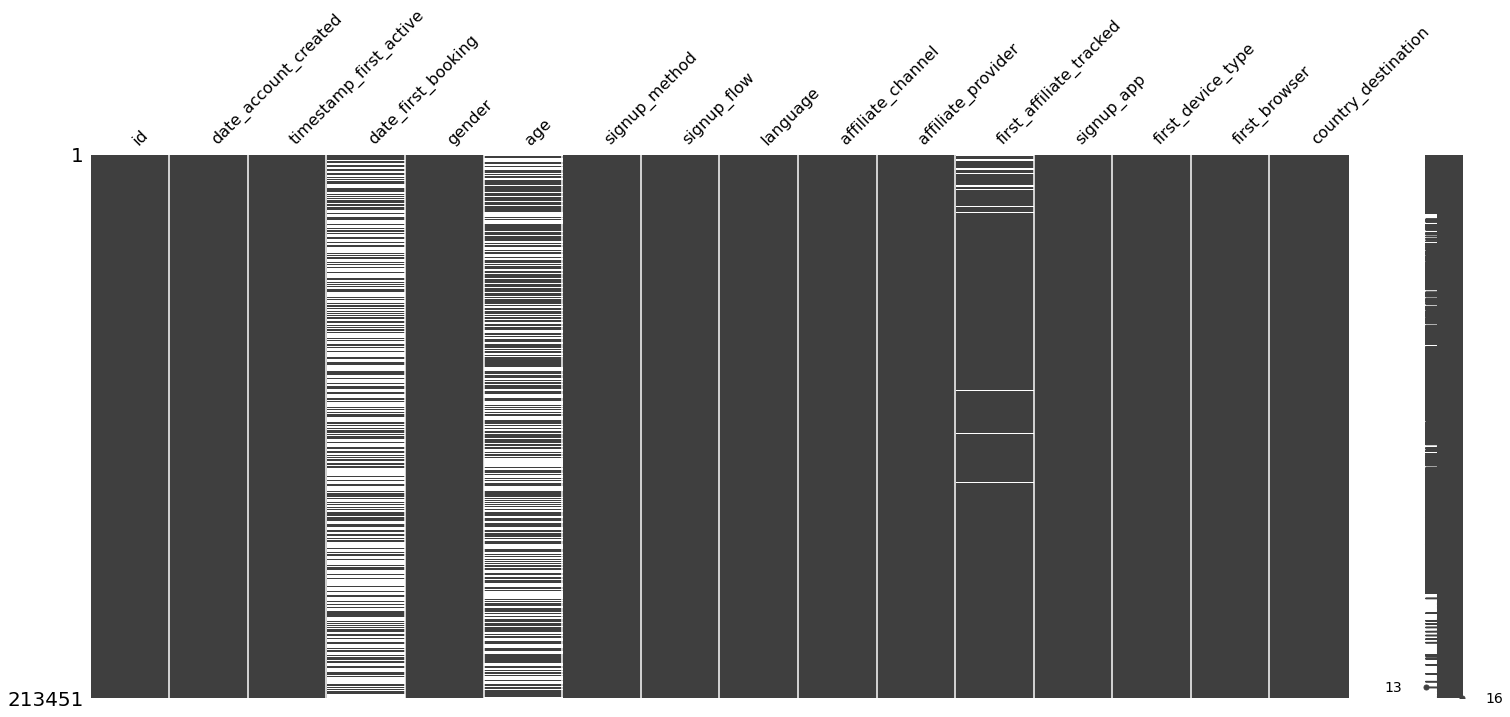

In [3]:
msno.matrix(user_data)

In [4]:
user_data.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


### Numerical Data

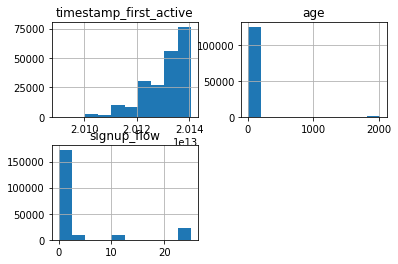

In [10]:
ax = user_data.hist()
ax[0][0].figure.savefig('./images/numerical_hist.png')
# fig.savefig('./images/numerical_hist.png', bbox_inches = 'tight')

In [ ]:
plt.savefig('./images/age_dsitribution.png', bbox_inches = 'tight')

### Categorical Data

In [12]:
categorical_attributes = user_data.drop(columns=['timestamp_first_active', 'age', 'signup_flow'])

In [13]:
categorical_attributes.head()

,id,date_account_created,date_first_booking,gender,signup_method,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,NaN,-unknown-,facebook,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,NaN,MALE,facebook,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,2010-08-02,FEMALE,basic,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,2012-09-08,FEMALE,facebook,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,2010-02-18,-unknown-,basic,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


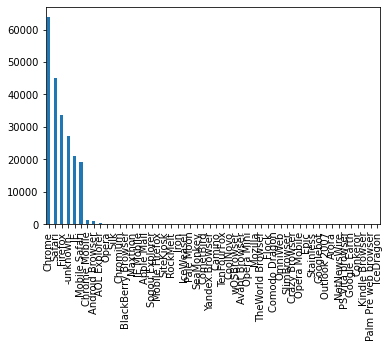

In [32]:
fig = categorical_attributes['first_browser'].value_counts().plot(kind='bar')
# fig
# .plot(kind='bar')
fig.figure.savefig('./images/browser_dist.png')

In [18]:
plt.savefig('./images/gender_dsitribution.png', bbox_inches = 'tight')

<Figure size 432x288 with 0 Axes>

## Session Data

In [33]:
session_data = pd.read_csv('./data/sessions.csv')

In [34]:
session_data.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


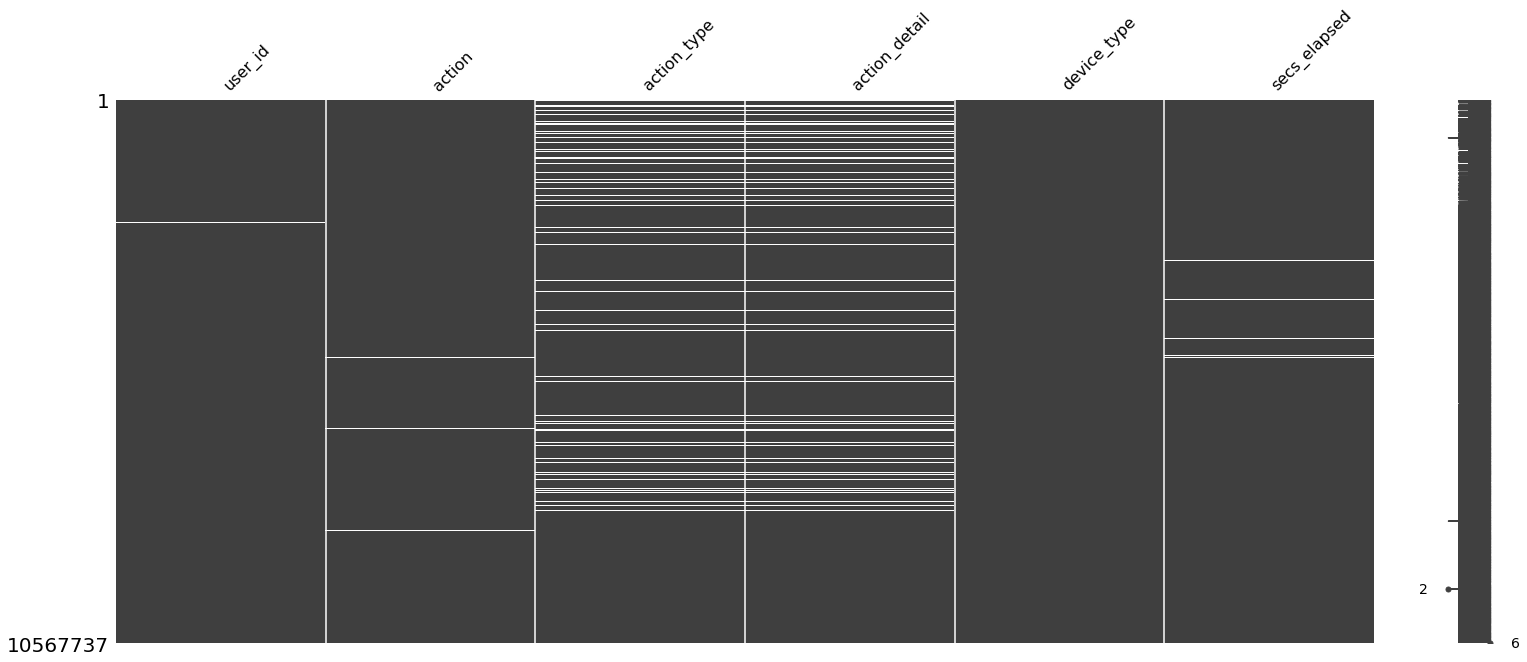

In [35]:
fig = msno.matrix(session_data)

array([[<AxesSubplot:title={'center':'secs_elapsed'}>]], dtype=object)

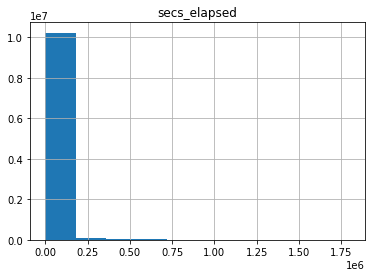

In [36]:
session_data.hist()

In [39]:
session_data.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


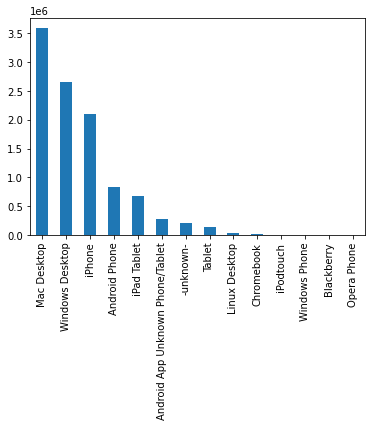

In [45]:
fig = session_data['device_type'].value_counts().plot(kind='bar')

In [43]:
fig.figure.savefig('./images/action_type_dist.png')

# Data Pre-Processing

 ## Known Issues
 
 - Age column outliers
 - Drop action_detail and device_type
 - signup flow distribution concnentration
 - first browser noise
 - sparse columns

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import ndcg_score

In [2]:
session_data = pd.read_csv('./data/sessions.csv')
user_data = pd.read_csv('./data/train_users_2.csv')

### Age Column and Drop Columns

In [3]:
user_data = user_data[user_data.age <= 112]
user_data = user_data[user_data.age > 0]
user_data.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US


In [4]:
session_data = session_data.drop(columns=['action_detail', 'device_type'])
session_data.head()

,user_id,action,action_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,319.0
1,d1mm9tcy42,search_results,click,67753.0
2,d1mm9tcy42,lookup,NaN,301.0
3,d1mm9tcy42,search_results,click,22141.0
4,d1mm9tcy42,lookup,NaN,435.0


### Signup_flow Column Dist

array([[<AxesSubplot:title={'center':'timestamp_first_active'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'signup_flow'}>, <AxesSubplot:>]],
      dtype=object)

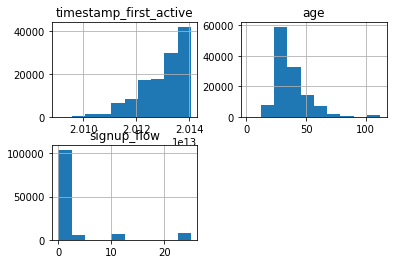

In [5]:
user_data.hist()

In [6]:
fig = user_data['signup_flow'].value_counts()
fig

0     99213
12     6205
25     5847
3      5376
2      4355
24     1600
23      993
1       535
21      195
6       148
8       144
5        31
16       11
20        5
15        3
10        1
4         1
Name: signup_flow, dtype: int64

### First_Browser Noise

In [7]:
fig = user_data['first_browser'].value_counts()
fig

Chrome                41779
Safari                27721
Firefox               20600
-unknown-             12115
IE                    10516
Mobile Safari         10340
Chrome Mobile           604
Android Browser         405
Opera                   113
AOL Explorer            100
Silk                     73
Chromium                 54
BlackBerry Browser       34
Maxthon                  28
Apple Mail               23
RockMelt                 21
Mobile Firefox           19
Sogou Explorer           13
IE Mobile                13
SiteKiosk                12
Iron                     12
IceWeasel                11
Yandex.Browser            9
Pale Moon                 7
Camino                    6
TenFourFox                6
CoolNovo                  4
Avant Browser             4
SeaMonkey                 3
SlimBrowser               2
TheWorld Browser          2
Opera Mobile              2
Mozilla                   2
wOSBrowser                2
Opera Mini                2
NetNewsWire         

In [8]:
cats = ['Chrome', 'Safari', 'Firefox', '-unknown-', 'IE', 'Mobile Safari']
cats_to_replace = list(set(user_data.first_browser.unique()) - set(cats))

cats_to_replace

['TenFourFox',
 'IE Mobile',
 'RockMelt',
 'Opera',
 'BlackBerry Browser',
 'Comodo Dragon',
 'Yandex.Browser',
 'Avant Browser',
 'IceWeasel',
 'Stainless',
 'wOSBrowser',
 'Camino',
 'NetNewsWire',
 'SiteKiosk',
 'Chrome Mobile',
 'Kindle Browser',
 'Opera Mobile',
 'PS Vita browser',
 'CometBird',
 'Mozilla',
 'CoolNovo',
 'Silk',
 'SeaMonkey',
 'Opera Mini',
 'SlimBrowser',
 'Apple Mail',
 'Maxthon',
 'Android Browser',
 'Chromium',
 'Pale Moon',
 'TheWorld Browser',
 'Iron',
 'AOL Explorer',
 'Sogou Explorer',
 'Mobile Firefox']

In [9]:
for cat in cats_to_replace:
    user_data.loc[(user_data.first_browser == cat),'first_browser']='Other'

In [10]:
fig = user_data['first_browser'].value_counts()
fig

Chrome           41779
Safari           27721
Firefox          20600
-unknown-        12115
IE               10516
Mobile Safari    10340
Other             1592
Name: first_browser, dtype: int64

### Sparse User Data Columns

In [11]:
imputer = KNNImputer(n_neighbors=3, weights="uniform")
user_data['imputed_age'] = imputer.fit_transform(user_data[['age']])
user_data = user_data.drop(columns=['age'])

In [12]:
user_data['date_first_booking'] = pd.to_datetime(user_data['date_first_booking'])
user_data['date_account_created'] = pd.to_datetime(user_data['date_account_created'])

In [13]:
imputer = KNNImputer(n_neighbors=12, weights="uniform")
user_data['imputed_date_first_booking'] = imputer.fit_transform(user_data[['date_first_booking']])
user_data = user_data.drop(columns=['date_first_booking'])

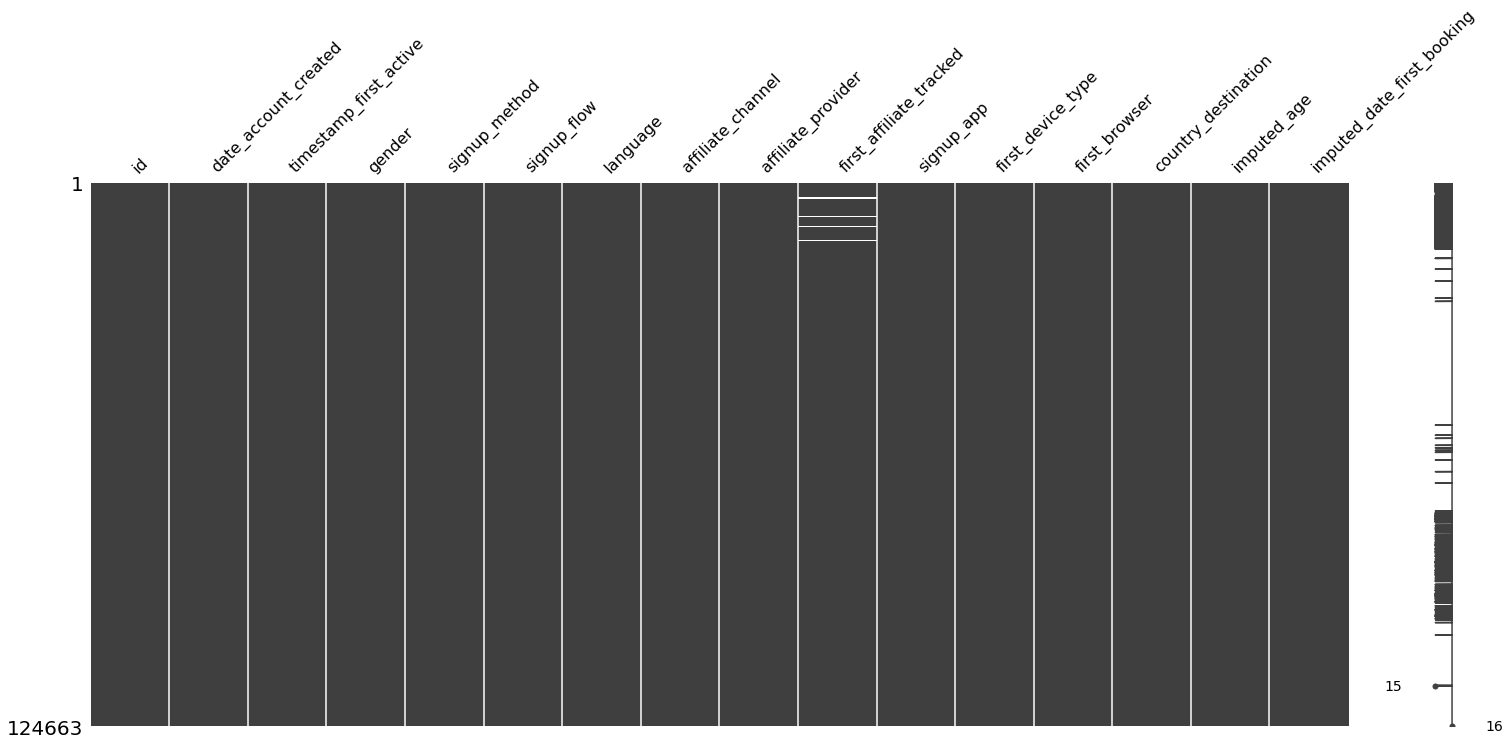

In [14]:
fig = msno.matrix(user_data)

In [15]:
fig.figure.savefig('./images/user_data_missingno_2.png', bbox_inches = 'tight')

### Combining User and Session Data

In [16]:
user_data = user_data.replace('-unknown-', 'UNK')
session_data = session_data.replace('-unknown-', 'UNK')

In [17]:
session_df = session_data.groupby(['user_id','action_type']).agg({'action':'count','secs_elapsed':'sum'}).reset_index()

In [18]:
train_df = user_data.merge(session_df,left_on=['id'],
                               right_on=['user_id'],how='left').drop(['user_id'],axis=1).reset_index(drop=True)

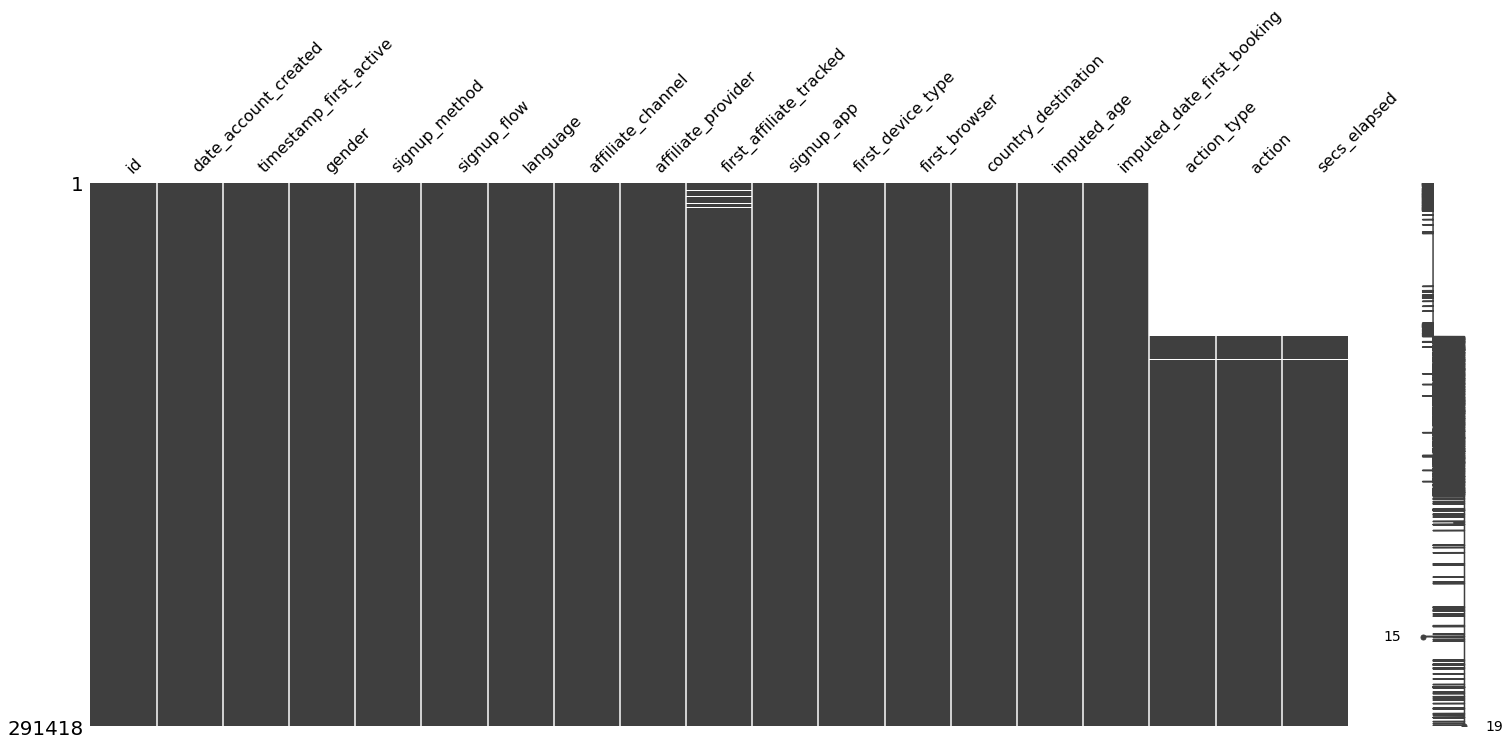

In [19]:
fig = msno.matrix(train_df)

In [20]:
fig.figure.savefig('./images/train_data_missingno_1.png', bbox_inches = 'tight')

### Pipeline Construction

In [21]:
train_df.rename({'imputed_age': "age", 'imputed_date_first_booking': "date_first_booking"}, axis=1, inplace=True)

In [22]:
categorical_cols=[cname for cname in train_df.columns if cname not in ['id','date_account_created','date_first_booking','first_device_type','first_browser',
                                                                            'timestamp_first_active','country_destination'] and 
                  train_df[cname].dtype == "object"]

numerical_cols=[cname for cname in train_df.columns if cname not in ['id','date_account_created','date_first_booking','first_device_type','first_browser',
                                                                          'timestamp_first_active','country_destination'] and 
                train_df[cname].dtype != "object"]

print("Categorical_cols - \n",categorical_cols)
print("Numerical_cols - \n",numerical_cols)

Categorical_cols - 
 ['gender', 'signup_method', 'language', 'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked', 'signup_app', 'action_type']
Numerical_cols - 
 ['signup_flow', 'age', 'action', 'secs_elapsed']


In [23]:
# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numerical_transformer, numerical_cols)
    ])

## Model Selection

In [25]:
labels = train_df.country_destination
le = LabelEncoder()
train_y = le.fit_transform(labels) 
train_X = train_df.drop(columns=['country_destination'])

In [26]:
def cross_validation_with_ndcg(pipe, X, y, scorer, cv=5):
    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=100)
    # initialize score array
    scores = []
    for train_index, holdout_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[holdout_index]
        y_train, y_test = y[train_index], y[holdout_index]
        pipe.fit(X_train, y_train)
        predict = pipe.predict_proba(X_test)
        y_test = pd.get_dummies(y_test).to_numpy()
        score = scorer(y_test, predict)
        scores.append(round(score, 6))
        print(f'{len(scores)} / {cv} DONE!', end='\r')
    return scores

In [ ]:
#grid search
n_estimaters_param=[50, 100, 200]
max_depth_param=[3,4,5]
learning_rate_param=[0.1,0.2]

params = [(x, y, z) for x in learning_rate_param for y in n_estimaters_param for z in max_depth_param]

result_list=[]

for learning_rates,n_estimaters, max_depth in params:
    xg_model_ = XGBClassifier(max_depth=max_depth,learning_rate=learning_rates, n_estimators=n_estimaters,verbosity=0,
                              objective='multi:softprob',n_jobs=-1, use_label_encoder=True)
    search_pipe = Pipeline([
        ('preprocessor', preprocessor),
        ("model", xg_model_)
    ])
    print(f'learning_rate: {learning_rates}, n_estimaters: {n_estimaters}, max_depth: {max_depth}')
    scores = cross_validation_with_ndcg(search_pipe, train_X, train_y, ndcg_score)
    result_list.append([learning_rates,n_estimaters,max_depth,np.mean(scores)])

In [ ]:
result_df=pd.DataFrame(result_list,columns=['learning_rate','n_estimator','max_depth','mean_score'])
result_df.sort_values(by='mean_score',ascending=False).head(5)

## Predicition

In [26]:
train_X.shape

(291418, 18)

In [27]:
test_data = pd.read_csv('./data/test_users.csv')

In [28]:
test_data.shape

(62096, 15)

In [29]:
test_X = test_data.merge(session_df.drop_duplicates(subset=['user_id']),left_on=['id'],right_on=['user_id'],how='left').drop(['user_id'],axis=1).reset_index(drop=True)

In [30]:
test_X.shape

(62096, 18)

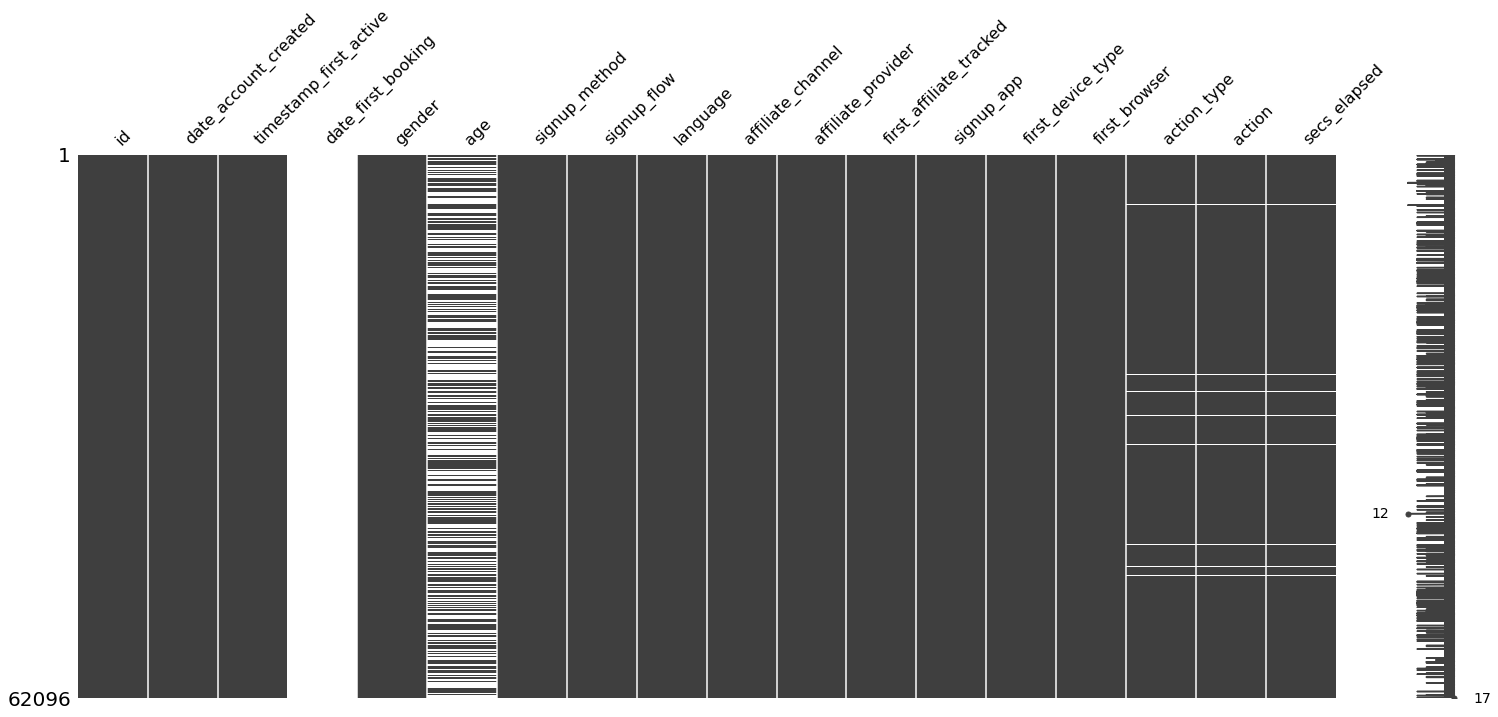

In [31]:
fig = msno.matrix(test_X)

In [32]:
xg_model = XGBClassifier(max_depth=4,learning_rate=0.1, n_estimators=200,verbosity=0,objective='multi:softprob',n_jobs=-1)
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ("model", xg_model)
])
pipe.fit(train_X, train_y)
pred = pipe.predict_proba(test_X)

C:\Users\AdamWilson\anaconda3\envs\dataMiningFinal\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [33]:
test_user_id = test_X.id

In [60]:
ids = []
cts = []
for i in range(len(test_user_id)):
    ids.append(test_user_id[i])
    cts.append(le.inverse_transform(np.argsort(pred[i])[::-1])[:5].tolist()[0])

In [61]:
sub_df = pd.DataFrame(np.column_stack((ids, cts)), columns=['id', 'country'])
sub_df

,id,country
0,5uwns89zht,NDF
1,jtl0dijy2j,NDF
2,xx0ulgorjt,NDF
3,6c6puo6ix0,NDF
4,czqhjk3yfe,NDF
...,...,...
62091,cv0na2lf5a,US
62092,zp8xfonng8,NDF
62093,fa6260ziny,NDF
62094,87k0fy4ugm,NDF


In [62]:
sub_df.to_csv('submission-02.csv',index=False)